### Create alongshore half gaussian pulse wind stress file

* Find meridional and zonal contirbutions to get alongshore wind stress pulse, spatially uniform.
* Generate zonal and meridional binary files for upwelling and downwelling favourable alongshore windstress (4 files).
* Gaussian pulse, e-fold of value `sigma`, max windstress of `max_tau`, centered in time around `center`

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### INPUT

Only change these values

In [4]:
## Gaussian pulse
nt = 120 # number of wind records
end_time = 60 # end time of records
t = np.linspace(0,end_time,nt) # time array of wind records
max_tau = 0.1
sigma = 1 # 2
center = 3.5 #5.5
gauss = max_tau*np.exp(-((t-center)**2)/(2*sigma))
mask = t>center
gauss[mask]=0

## Rotation angle (in deg) to get alongshore winds (see previous notebook)
angle_up = 120. # upwelling favourable
angle_down = 300. # downwelling favourable

## Grid size
nx = 448 
ny = 512 
lat_bot = 27.0 
lat_top = 35.0 

# filenames - 4 files created: 2 upw (zonal and meridional components), 2 downwelling (zonal and merid)
run_desc = 'halfgauss2hr' # descriptive string to add to wind filename. 
                     # Final name is eg. upwelling_merid_gauss1d_160x224.bin saved in dir 160x224/

### Make files

This is your half gaussian pulse
0.00021874911181828853


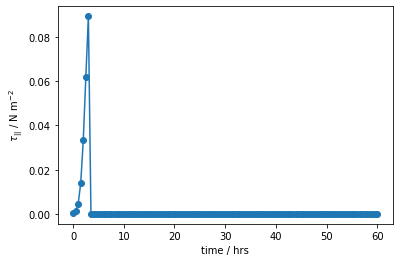

In [5]:
plt.plot(t,gauss,'-o')
plt.xlabel('time / hrs')
plt.ylabel(r'$\tau_{||}$ / N m$^{-2}$')
print('This is your half gaussian pulse')
print(gauss[0])

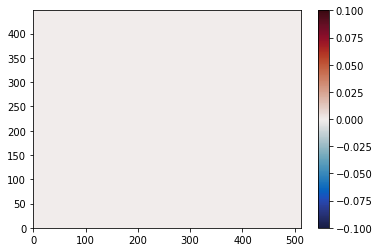

In [6]:
### Rotate winds
windstress= np.expand_dims(np.expand_dims(gauss,0),0) + np.zeros((nx,ny,nt))

alpha = np.radians(120.)
alpha2 = np.radians(300.)

zonal_tau = windstress*np.cos(alpha)
merid_tau = windstress*np.sin(alpha)

zonal_tau2 = windstress*np.cos(alpha2)
merid_tau2 = windstress*np.sin(alpha2)

cm = plt.pcolormesh(zonal_tau[:,:,7], cmap=cmo.cm.balance)
plt.colorbar(cm)

In [7]:
### Write binary files
dt = np.dtype('>f8')  # float 64 big endian

wind_fname1 = '%dx%d/downwelling_merid_%s_%dx%d.bin' %(nx,ny,run_desc,nx,ny)
fileobj = open(wind_fname1, mode='wb')
dd=merid_tau.transpose((2,0,1))
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

wind_fname2 = '%dx%d/downwelling_zonal_%s_%dx%d.bin' %(nx,ny,run_desc,nx,ny)
fileobj = open(wind_fname2, mode='wb')
dd=zonal_tau.transpose((2,0,1))
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

wind_fname3 = '%dx%d/upwelling_zonal_%s_%dx%d.bin' %(nx,ny,run_desc,nx,ny)
fileobj = open(wind_fname3, mode='wb')
dd=zonal_tau2.transpose((2,0,1))
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

wind_fname4 = '%dx%d/upwelling_merid_%s_%dx%d.bin' %(nx,ny,run_desc,nx,ny)
fileobj = open(wind_fname4, mode='wb')
dd=merid_tau2.transpose((2,0,1))
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

#### Check that bin file works when read by fortran

(27525120,)


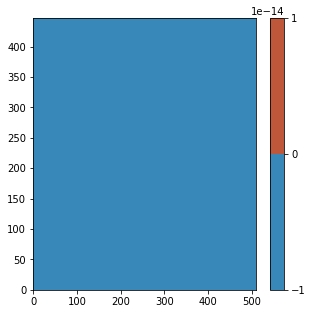

In [8]:
cc=np.fromfile(wind_fname3, dtype=dt)
print(np.shape(cc))

bF=np.reshape(cc,[nx,ny,nt],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF[:,:,20], 20, cmap=cmo.cm.balance)
plt.colorbar(pc,ax=ax)

In [9]:
wind_fname1

'448x512/downwelling_merid_halfgauss2hr_448x512.bin'